Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



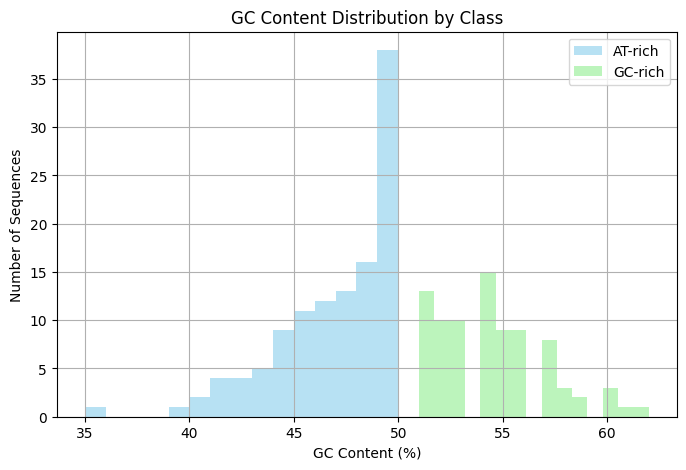

In [8]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Function to generate a random DNA sequence
def generate_dna(length):
    return ''.join(random.choices(['A', 'T', 'G', 'C'], k=length))

# Function to calculate GC content
def gc_content(seq):
    gc = seq.count('G') + seq.count('C')
    return (gc / len(seq)) * 100

# Create dataset
data = []
for _ in range(200):
    seq = generate_dna(100)
    gc = gc_content(seq)
    label = 'GC-rich' if gc > 50 else 'AT-rich'
    data.append([seq, gc, label])

# Load into pandas DataFrame
df = pd.DataFrame(data, columns=['Sequence', 'GC_Content', 'Label'])
df.head()

# Convert labels to binary: GC-rich = 1, AT-rich = 0
df['Label'] = df['Label'].map({'GC-rich': 1, 'AT-rich': 0})

# Features and labels
X = df[['GC_Content']]  # only one feature for now
y = df['Label']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot histogram of GC content grouped by label
plt.figure(figsize=(8,5))
for label, color in zip([0, 1], ['skyblue', 'lightgreen']):
    subset = df[df['Label'] == label]
    plt.hist(subset['GC_Content'], bins=15, alpha=0.6, label='AT-rich' if label == 0 else 'GC-rich', color=color)

plt.xlabel('GC Content (%)')
plt.ylabel('Number of Sequences')
plt.title('GC Content Distribution by Class')
plt.legend()
plt.grid(True)
plt.show()